## Начнем со стандартных импортов

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Если запускаете ноутбук локально:
data = pd.read_csv('titanic_data.csv', index_col='PassengerId')

In [3]:
y = pd.read_csv('titanic_surv.csv')
y.index = data.index

print(f'Всего {len(data)} пассажиров в выборке')
data.head()

Всего 891 пассажиров в выборке


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [5]:
data = data.join(y)
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [6]:
# распределение пассажиров по классам
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [7]:
# распределение пассажиров по полу
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
# сделаем датасет с выжившими пассажирами
data_survived = data.query('Survived == 1')

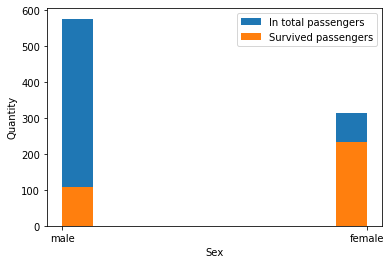

Процент выживших мужчин: 18.89
Процент выживших женщин: 74.2
Вероятность выжить будучи женщиной выше в 3.93 раза


In [11]:
# посмотрим на распределение пассажиров по полу
plt.hist(data['Sex'], label='In total passengers')
plt.hist(data_survived['Sex'], label='Survived passengers')
plt.legend(loc='upper right')
plt.xlabel('Sex')
plt.ylabel('Quantity')
plt.show()

# находим процент выживших мужчин
men_surv = len(data_survived.query('Sex == "male"')) / len(data.query('Sex == "male"'))
# находим процент выживших женщин
women_surv = len(data_survived.query('Sex == "female"')) / len(data.query('Sex == "female"'))

print("Процент выживших мужчин:", round(men_surv*100, 2))
print("Процент выживших женщин:", round(women_surv*100, 2))
print("Вероятность выжить будучи женщиной выше в", round(women_surv/men_surv, 2), "раза")

C:\Users\79261\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\79261\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


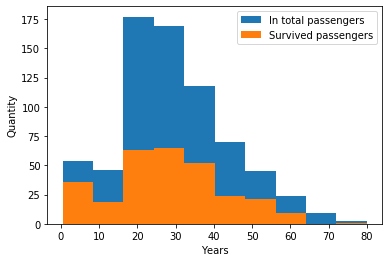

In [12]:
# посмотрим на распределение пассажиров по возрасту
plt.hist(data['Age'], label='In total passengers')
plt.hist(data_survived['Age'], label='Survived passengers')
plt.legend(loc='upper right')
plt.xlabel('Years')
plt.ylabel('Quantity')
plt.show()

Выползает предуреждение, что не для всех пассажиров указан возраст - необходимо заполнять пропущенные данные. Этим мы займемся дальше.

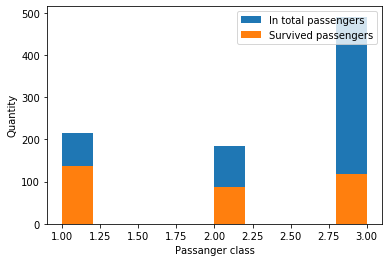

Процент выживших пассажиров 1 класса: 62.96
Процент выживших пассажиров 2 класса: 47.28
Процент выживших пассажиров 3 класса: 24.24


In [13]:
# посмотрим на распределение пассажиров по классу
plt.hist(data['Pclass'], label='In total passengers')
plt.hist(data_survived['Pclass'], label='Survived passengers')
plt.legend(loc='upper right')
plt.xlabel('Passanger class')
plt.ylabel('Quantity')
plt.show()

# находим процент выживших пассажиров 1 класса
Pclass_1_surv = len(data_survived.query('Pclass == 1')) / len(data.query('Pclass == 1'))
# находим процент выживших пассажиров 2 класса
Pclass_2_surv = len(data_survived.query('Pclass == 2')) / len(data.query('Pclass == 2'))
# находим процент выживших пассажиров 3 класса
Pclass_3_surv = len(data_survived.query('Pclass == 3')) / len(data.query('Pclass == 3'))

print("Процент выживших пассажиров 1 класса:", round(Pclass_1_surv*100, 2))
print("Процент выживших пассажиров 2 класса:", round(Pclass_2_surv*100, 2))
print("Процент выживших пассажиров 3 класса:", round(Pclass_3_surv*100, 2))

## Заполнение пропусков в данных
В данных имеются пропуски в трёх колонках: 

In [14]:
data.columns[data.isna().any()].tolist()

['Age', 'Cabin', 'Embarked']

Для простоты заполним все пропуски в категориальных колонках новым классом "0", а в числовой колонке Age --- медианным значением. 

In [15]:
data.loc[:, ['Cabin', 'Embarked']] = data.loc[:, ['Cabin', 'Embarked']].fillna('0')
data['Age'] = data['Age'].fillna(data['Age'].median())

## Разделим выборку на train и test

In [16]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.3, random_state=0)

In [17]:
#выбросим из train и test текстовые переменные, т.к. они не участвуют в обучении модели
data_train = data_train.drop(['Name', 'Ticket', 'Cabin'], axis=1)
data_test = data_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [18]:
#закодируем категориальные переменные с помощью One-Hot-Encoding
data_train = pd.get_dummies(data_train).drop(['Embarked_0'], axis=1)
data_test = pd.get_dummies(data_test)

## Обучим логистическую регрессию


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

#разобъем data_train и data_test на признаки X и предсказываемый параметр y
X_train = data_train.drop(['Survived'], axis=1)
X_test = data_test.drop(['Survived'], axis=1)
y_train = data_train['Survived']
y_test = data_test['Survived']

#создадим и обучим классификатор, поставим максимальное число итераци
clf_LR = LogisticRegression(max_iter=1000, random_state=0)

#проверим качество на кросс-валидации
scores = cross_val_score(clf_LR, X_train, y_train, cv=5)

print(scores.mean())

0.7914193548387097


## Обучим дерево и Random Forest

In [20]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier(random_state=0)
scores_tree = cross_val_score(clf_tree, X_train, y_train, cv=5)
print(scores_tree.mean())

0.7768516129032259


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#подберем оптимальные параметры для RF
clf_RF = RandomForestClassifier(random_state=0)
parametrs = {'n_estimators':      range(10, 50, 10),
             'max_depth':         range(1, 12, 2),
             'min_samples_leaf':  range(1, 7),
             'min_samples_split': range(2, 9, 2)}

clf_grid = GridSearchCV(clf_RF, param_grid=parametrs, cv=3, n_jobs=-1)
clf_grid.fit(X_train, y_train)
best_RF = clf_grid.best_estimator_
scores_RF = cross_val_score(best_RF, X_train, y_train, cv=5)
print(scores_RF.mean())

0.8282709677419355


[[153  15]
 [ 30  70]]


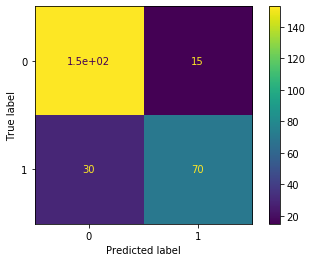

In [22]:
from sklearn.metrics import plot_confusion_matrix

#построим матрицу предсказаний для модели RandomForest

disp = plot_confusion_matrix(best_RF, X_test, y_test)

print(disp.confusion_matrix)

Простая логистическая регрессия показала на кросс-валидации точность 0.79. Дерево решений с параметрами по умолчанию показало наименьшую точность на кроссвалидации из всех рассмотренных методов - 0.78. Используя Случайный Лес решений с поиском оптимальных параметров, мы получили наиболее точный классификатор с общим показателем точности 0.83 на кросс-валидации